In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_data = "/content/drive/MyDrive/Colab Notebooks/DIVEINTOCODE/Data/train.csv"

In [ ]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose, random_state=0):
      # Record hyperparameters as attributes
      self.iter = num_iter
      self.lr = lr
      self.no_bias = no_bias
      self.verbose = verbose
      self.random_state = 0
      # Prepare an array to record the loss
      self.loss = np.zeros(self.iter)
      self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
      """
      Compute a linear hypothetical function
      Parameters
      ----------
      X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
      Returns
      -------
        The following form of ndarray, shape (n_samples, 1)
        Estimated result by linear hypothetical function
      """
      parameters = np.insert(self.coef_, 0, self.bias_, axis=0)
      # print(self.coef_)
      # print(self.bias_)
      h = np.matmul(X, parameters.T)
      return h

    def _gradient_descent(self, X, y):
      """
      Write a description
      """
      m = X.shape[0]

      parameters = np.insert(self.coef_, 0, self.bias_, axis=0)
      y_pred = self._linear_hypothesis(X)
      grad = 1/m * np.matmul( np.subtract(y_pred,y).T , X )
      self.bias_ = self.bias_ - self.lr*grad[0]
      self.coef_ = self.coef_ - self.lr*grad[1:]

    def _loss_function(self, X, y):
      m = y.shape[0]
      parameters = np.insert(self.coef_, 0, self.bias_, axis=0)
      y_pred = self._linear_hypothesis(X)
      return 1/(2*m) * np.sum( np.power(np.subtract(y_pred,y), 2) )

    def _linear_combination(self, X):
        bias = np.ones(X.shape[0]) if not self.no_bias else np.zeros(X.shape[0])
        return np.concatenate([bias.reshape(-1, 1), X], axis=1)

    def fit(self, X, y, X_val=None, y_val=None):
      """
      Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
      Parameters
      ----------
      X : The following forms of ndarray, shape (n_samples, n_features)
          Features of training data
      y : The following form of ndarray, shape (n_samples,)
          Correct answer value of training data
      X_val : The following forms of ndarray, shape (n_samples, n_features)
          Features of verification data
      y_val : The following form of ndarray, shape (n_samples,)
          Correct value of verification data
      """
      n_samples = X.shape[0]
      n_features = X.shape[1]

      # Add bias
      X = self._linear_combination(X)
      if X_val is not None:
          X_val = self._linear_combination(X_val)

      # Init thetas
      np.random.seed(self.random_state)
      self.coef_ = np.random.randn(X.shape[1]-1)
      self.bias_ = np.random.randn(1)

      for i in range(self.iter):
          self._gradient_descent(X, y)

          self.loss[i] = self._loss_function(X, y)
          if X_val is not None and y_val is not None:
              self.val_loss[i] = self._loss_function(X_val, y_val)
          
          if self.verbose:
            if not self.no_bias:
              print(f'iteration: {i} loss: {self.loss[i]} theta: {self.bias_.tolist()+self.coef_.tolist()}')
            else:
              print(f'iteration: {i} loss: {self.loss[i]} theta: {self.coef_}')
        
    def predict(self, X):
      """
      Estimate using linear regression.
      Parameters
      ----------
      X : The following forms of ndarray, shape (n_samples, n_features)
          sample
      Returns
      -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by linear regression
      """
      X = self._linear_combination(X)
      return self._linear_hypothesis(X)

def MSE(y_pred, y):
  """
  Calculation of mean square error
  Parameters
  ----------
  y_pred : 次の形のndarray, shape (n_samples,)
    Estimated value
  y : 次の形のndarray, shape (n_samples,)
    Correct answer value
  Returns
  ----------
  mse : numpy.float
    Mean squared error
  """
  m = y.shape[0]
  mse = 1/m* np.sum( np.power(np.subtract(y_pred,y), 2) )
  return mse

### **Problem 6**

### Learning and estimation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    return X_train, X_val, y_train, y_val

def train_and_validate(X_train, X_val, y_train, y_val, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"MSE of {model_name}: {MSE(y_pred, y_val)}")

### Load Housing dataset 

In [ ]:
data = pd.read_csv(path_to_data)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X, y = data[["GrLivArea", "YearBuilt"]].values, data["SalePrice"].values

###Compare scratch model and scikit learn model

In [ ]:
preprocessed_data = preprocess(X, y)

from sklearn.linear_model import SGDRegressor

scratch_model = ScratchLinearRegression(100000, 0.001, False, False)
sklearn_model = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.001, random_state=0)

train_and_validate(*preprocessed_data, scratch_model, "Scratch Linear Regressor")
train_and_validate(*preprocessed_data, sklearn_model, "Sklearn Linear Regressor")

MSE of Scratch Linear Regressor: 2942066921.6720386
MSE of Sklearn Linear Regressor: 2956606709.7871614


###**Problem 7**

###Learning curve plot

In [ ]:
def plot_learning_curve(train_loss, val_loss=None):
    plt.figure(figsize=(16, 8))
    plt.plot(train_loss, label="train_loss", linewidth=5)
    if val_loss is not None:
        plt.plot(val_loss, label="val_loss", linewidth=5)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

def train_and_visualize(X_train, y_train, X_val, y_val, model, model_name):
    model.fit(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_val)
    print(f"MSE of {model_name}: {MSE(y_pred, y_val)}")

    plot_learning_curve(model.loss, model.val_loss)

####Learning curve of scratch model

MSE of Scratch Linear Regressor: 2942013254.740164


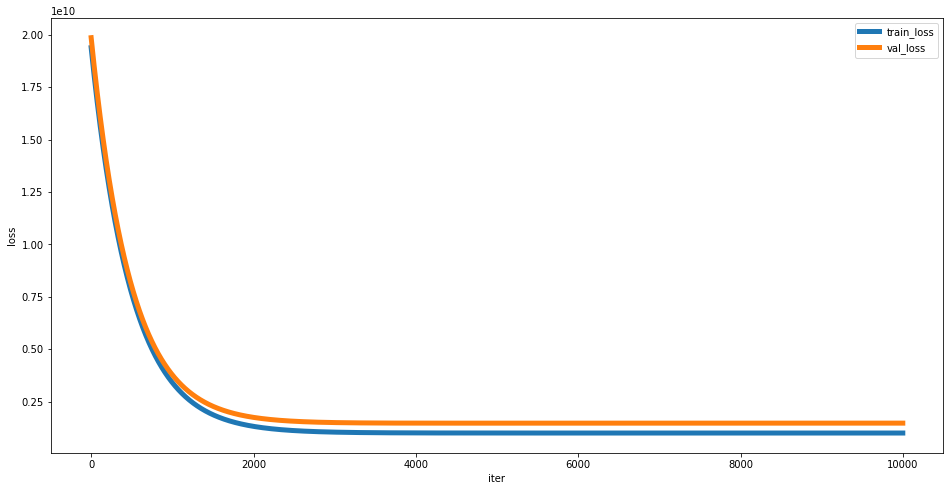

In [ ]:
scratch_model = ScratchLinearRegression(10000, 0.001, False, False)
X_train, X_val, y_train, y_val = preprocess(X, y)

train_and_visualize(X_train, y_train, X_val, y_val, scratch_model, "Scratch Linear Regressor")

###**Problem 8**
###(Advance task) Removal of bias term

MSE of Scratch model with bias: 2942013254.740164


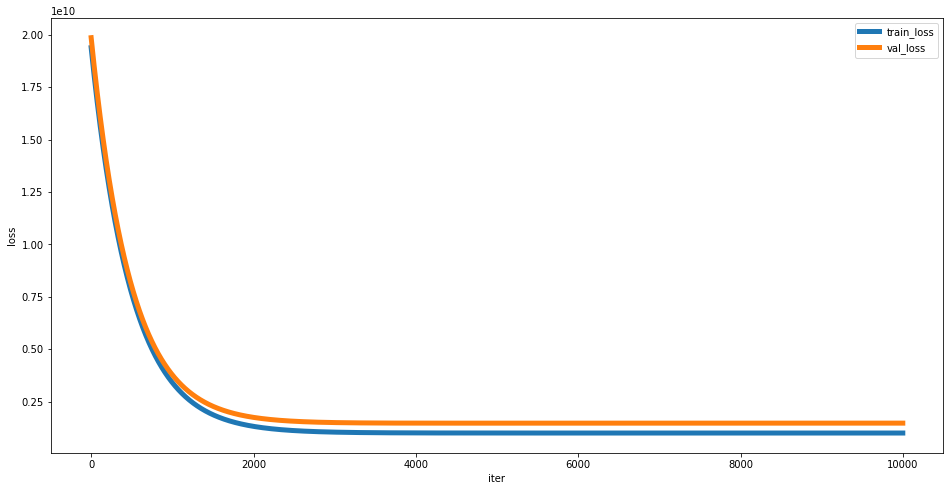

In [ ]:
X_train, X_val, y_train, y_val = preprocess(X, y)

model_with_bias = ScratchLinearRegression(10000, 0.001, False, False)
train_and_visualize(X_train, y_train, X_val, y_val, model_with_bias, "Scratch model with bias")

MSE of Scratch model with no bias: 35742307239.01329


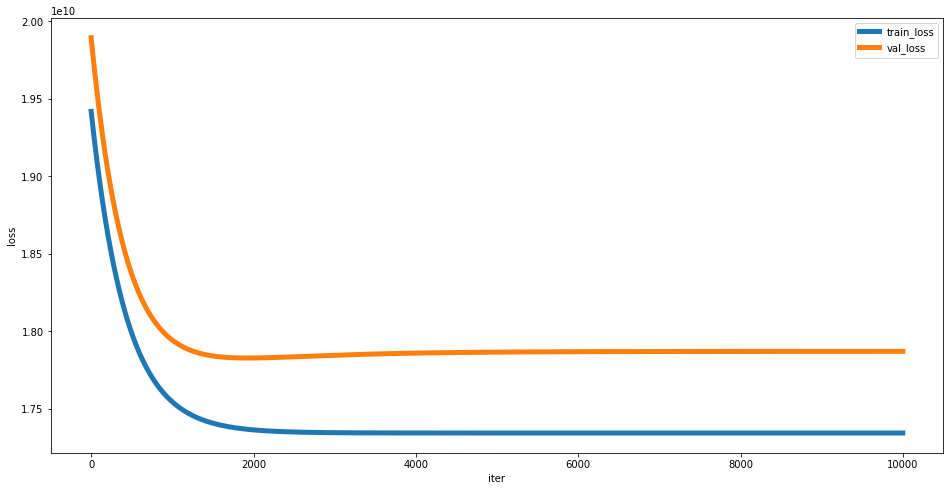

In [ ]:
model_with_no_bias = ScratchLinearRegression(10000, 0.001, True, False)
train_and_visualize(X_train, y_train, X_val, y_val, model_with_no_bias, "Scratch model with no bias")

Without bias, the decision boundary (hypothesis function) will go around the origin coordinate, example in a 2-dimension plane: (0,0). This requires your data must go through the origin coordinate, or else the decision boundary hyperplane may not fit well, or it must required data normalization.

###**Problem 9**

###(Advance task) Multidimensional feature quantity

In [ ]:
def polynomial_transform(X):
  num_observation = X.shape[0]
  num_features = X.shape[1]

  X = np.array( [[ np.power(X[i][j], 3) for j in range(num_features) ] for i in range(num_observation) ] )
  return X

In [ ]:
X_poly = polynomial_transform(X)

MSE of Scratch model polynomial features: 7815903717.126525


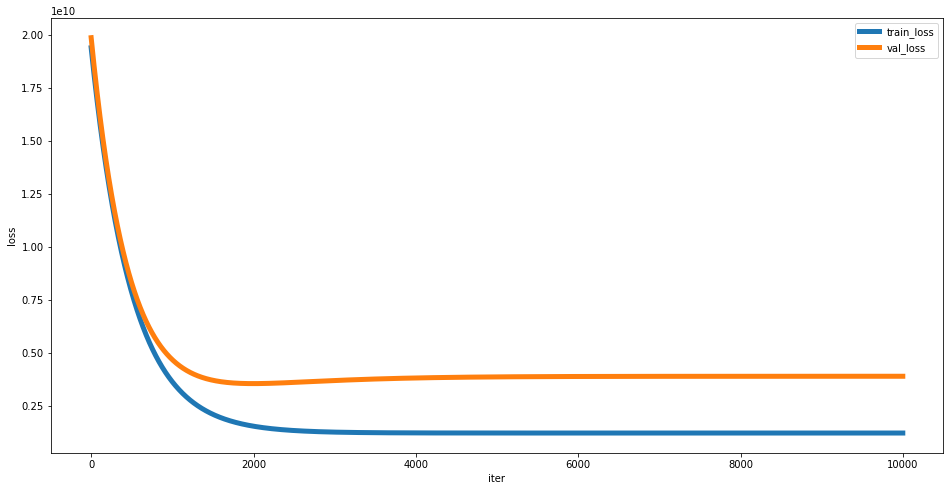

In [77]:
X_train, X_val, y_train, y_val = preprocess(X_poly, y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
model_poly = ScratchLinearRegression(10000, 0.001, False, False)
train_and_visualize(X_train, y_train, X_val, y_val, model_poly, "Scratch model polynomial features")

The model fitted perfectly on the training set, but failed to fit on the validation set, because the decision boundary is no longer linear but rather more complicated, causing a phenomenon called overfitting.